In [3]:
ls

41315_to_41915.csv  bikeshare.ipynb


In [21]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pylab

In [9]:
data = pd.read_csv('41315_to_41915.csv', header=0)

In [10]:
data.head()

,Terminal Number,Station Name,Status,Start,End,Duration
0,31101,14th & V St NW,full,2015-04-19 22:20:16,2015-04-19 23:02:44,42
1,31257,22nd & I St NW / Foggy Bottom,full,2015-04-19 20:35:04,2015-04-19 22:38:28,123
2,31280,11th & S St NW,full,2015-04-19 21:12:30,2015-04-19 21:37:48,25
3,31632,15th & F St NE,full,2015-04-19 21:14:32,2015-04-19 21:33:45,19
4,31121,Calvert St & Woodley Pl NW,empty,2015-04-19 19:15:11,2015-04-19 21:29:42,135


In [11]:
data['start_time'] = data['Start'].apply(lambda(x): pd.to_datetime(x))
data['end_time'] = data['End'].apply(lambda(x): pd.to_datetime(x))
data = data.drop('Start', 1)
data = data.drop('End', 1)

In [12]:
data.head()

,Terminal Number,Station Name,Status,Duration,start_time,end_time
0,31101,14th & V St NW,full,42,2015-04-19 22:20:16,2015-04-19 23:02:44
1,31257,22nd & I St NW / Foggy Bottom,full,123,2015-04-19 20:35:04,2015-04-19 22:38:28
2,31280,11th & S St NW,full,25,2015-04-19 21:12:30,2015-04-19 21:37:48
3,31632,15th & F St NE,full,19,2015-04-19 21:14:32,2015-04-19 21:33:45
4,31121,Calvert St & Woodley Pl NW,empty,135,2015-04-19 19:15:11,2015-04-19 21:29:42


In [28]:
stations = pd.Series(data['Station Name'].unique())

In [13]:
empty = data[data['Status'] == 'empty']
full = data[data['Status'] == 'full']

Check if empty and full sum to total data

In [14]:
if (len(empty) + len(full) == len(data)):
    print True
else:
    print False

True


In [15]:
empty.head()

,Terminal Number,Station Name,Status,Duration,start_time,end_time
4,31121,Calvert St & Woodley Pl NW,empty,135,2015-04-19 19:15:11,2015-04-19 21:29:42
7,31602,Park Rd & Holmead Pl NW,empty,30,2015-04-19 20:51:16,2015-04-19 21:21:36
10,31602,Park Rd & Holmead Pl NW,empty,15,2015-04-19 20:27:59,2015-04-19 20:43:10
15,31105,14th & Harvard St NW,empty,32,2015-04-19 19:34:24,2015-04-19 20:06:45
20,31029,N Veitch & 20th St N,empty,16,2015-04-19 19:25:17,2015-04-19 19:41:28


In [19]:
empty['start_time'][4]

Timestamp('2015-04-19 19:15:11')

In [62]:
print data['start_time'].min()
print data['end_time'].max()

2015-04-12 21:29:03
2015-04-19 23:02:44


In [34]:
rng = pd.date_range('4/12/2015 23:00', periods=170, freq='H')

Calculate counts per hour for each station by hour of the day

In [395]:
def get_freq(status):

    freq = pd.DataFrame(columns=['hour','station', 'count'])

    for station in stations:
        
        if status == 'empty':
            freq_station = empty[empty['Station Name'] == station ]
        else:
            freq_station = full[full['Station Name'] == station ]

        station_times = pd.DataFrame()
        station_times['hour'] = rng
        station_times['station'] = station
        station_times['count'] = 0

        for index,item in station_times.iterrows():

            for index,row in freq_station.iterrows():
                start = pd.datetime(row['start_time'].year, row['start_time'].month, row['start_time'].day, row['start_time'].hour)
                end = pd.datetime(row['end_time'].year, row['end_time'].month, row['end_time'].day, row['end_time'].hour)

                if start <= item['hour'] and end >= item['hour']:
                    station_times.ix[item.name, 'count'] += 1

        freq = freq.append(station_times)
        
    return freq

In [396]:
%time freq_empty = get_freq('empty')

CPU times: user 1min 52s, sys: 902 ms, total: 1min 53s
Wall time: 1min 53s


In [398]:
%time freq_full = get_freq('full')

CPU times: user 1min 41s, sys: 746 ms, total: 1min 42s
Wall time: 4min 21s


In [400]:
freq_full_hourly = freq_full.groupby('hour')['count'].sum()

In [401]:
freq_empty_hourly = freq_empty.groupby('hour')['count'].sum()

In [418]:
freq = pd.DataFrame()
freq['count_full'] = freq_full_hourly.values
freq['count_empty'] = freq_empty_hourly.values
freq.index = rng
freq = freq[1:169]

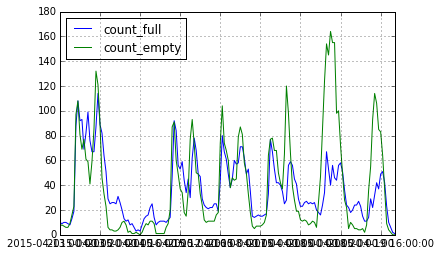

In [22]:
freq.plot()

In [3]:
freq = pd.read_csv('frequency_counts.csv', index_col=0)

In [55]:
freq['time'] = freq.index.to_series().apply(lambda (x): pd.to_datetime(x).strftime(format='%m/%d/%Y %H:%M'))

In [75]:
test = freq.to_json(orient='index')

In [77]:
test = freq.T.to_dict().values()

In [78]:
test

[{'count_empty': 19.0, 'count_full': 29.0, 'time': '04/17/2015 23:00'},
 {'count_empty': 6.0, 'count_full': 10.0, 'time': '04/13/2015 03:00'},
 {'count_empty': 11.0, 'count_full': 27.0, 'time': '04/18/2015 03:00'},
 {'count_empty': 50.0, 'count_full': 49.0, 'time': '04/16/2015 21:00'},
 {'count_empty': 100.0, 'count_full': 56.0, 'time': '04/18/2015 19:00'},
 {'count_empty': 41.0, 'count_full': 76.0, 'time': '04/13/2015 15:00'},
 {'count_empty': 1.0, 'count_full': 6.0, 'time': '04/14/2015 13:00'},
 {'count_empty': 91.0, 'count_full': 92.0, 'time': '04/15/2015 09:00'},
 {'count_empty': 4.0, 'count_full': 27.0, 'time': '04/19/2015 05:00'},
 {'count_empty': 19.0, 'count_full': 41.0, 'time': '04/17/2015 22:00'},
 {'count_empty': 16.0, 'count_full': 17.0, 'time': '04/17/2015 07:00'},
 {'count_empty': 81.0, 'count_full': 92.0, 'time': '04/13/2015 10:00'},
 {'count_empty': 66.0, 'count_full': 59.0, 'time': '04/17/2015 19:00'},
 {'count_empty': 10.0, 'count_full': 26.0, 'time': '04/18/2015 07:0

In [60]:
full = freq['count_full']
empty = freq['count_empty']

In [6]:
full = full.tolist()
empty = empty.tolist()

In [7]:
print full,

[10.0, 9.0, 10.0, 10.0, 9.0, 8.0, 13.0, 19.0, 88.0, 108.0, 92.0, 93.0, 69.0, 82.0, 99.0, 76.0, 67.0, 67.0, 87.0, 114.0, 89.0, 82.0, 64.0, 51.0, 29.0, 25.0, 26.0, 26.0, 25.0, 31.0, 26.0, 20.0, 13.0, 11.0, 12.0, 8.0, 9.0, 6.0, 3.0, 4.0, 3.0, 8.0, 13.0, 15.0, 16.0, 22.0, 25.0, 14.0, 8.0, 10.0, 11.0, 11.0, 11.0, 10.0, 12.0, 14.0, 47.0, 92.0, 84.0, 56.0, 53.0, 59.0, 44.0, 34.0, 45.0, 30.0, 62.0, 78.0, 68.0, 49.0, 47.0, 29.0, 24.0, 22.0, 21.0, 22.0, 22.0, 25.0, 25.0, 19.0, 44.0, 80.0, 67.0, 61.0, 49.0, 38.0, 45.0, 60.0, 57.0, 58.0, 71.0, 71.0, 62.0, 49.0, 53.0, 35.0, 15.0, 14.0, 15.0, 16.0, 15.0, 15.0, 16.0, 17.0, 33.0, 77.0, 67.0, 53.0, 42.0, 42.0, 40.0, 35.0, 25.0, 28.0, 56.0, 59.0, 56.0, 45.0, 41.0, 29.0, 23.0, 23.0, 26.0, 27.0, 25.0, 26.0, 25.0, 26.0, 20.0, 18.0, 16.0, 24.0, 34.0, 67.0, 53.0, 40.0, 56.0, 46.0, 44.0, 56.0, 58.0, 51.0, 36.0, 24.0, 22.0, 18.0, 20.0, 24.0, 24.0, 27.0, 23.0, 15.0, 11.0, 11.0, 14.0, 29.0, 22.0, 32.0, 42.0, 37.0, 49.0, 51.0, 42.0, 23.0, 10.0, 6.0, 2.0, 1.0]


In [26]:
print empty,

[7.0, 8.0, 7.0, 6.0, 6.0, 9.0, 16.0, 23.0, 97.0, 108.0, 81.0, 69.0, 77.0, 61.0, 59.0, 41.0, 59.0, 85.0, 132.0, 121.0, 90.0, 46.0, 33.0, 23.0, 6.0, 4.0, 4.0, 3.0, 3.0, 4.0, 6.0, 10.0, 11.0, 8.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 0.0, 2.0, 6.0, 9.0, 8.0, 11.0, 11.0, 9.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 9.0, 20.0, 87.0, 91.0, 60.0, 49.0, 37.0, 34.0, 18.0, 15.0, 35.0, 77.0, 93.0, 73.0, 50.0, 49.0, 33.0, 24.0, 12.0, 10.0, 11.0, 11.0, 11.0, 11.0, 16.0, 18.0, 74.0, 104.0, 74.0, 68.0, 60.0, 38.0, 46.0, 44.0, 45.0, 79.0, 87.0, 81.0, 58.0, 50.0, 33.0, 18.0, 7.0, 5.0, 7.0, 7.0, 7.0, 8.0, 10.0, 16.0, 64.0, 77.0, 78.0, 68.0, 68.0, 50.0, 42.0, 37.0, 65.0, 120.0, 98.0, 66.0, 39.0, 28.0, 19.0, 19.0, 12.0, 11.0, 12.0, 11.0, 8.0, 9.0, 11.0, 10.0, 6.0, 27.0, 47.0, 85.0, 124.0, 154.0, 145.0, 164.0, 155.0, 155.0, 98.0, 100.0, 72.0, 49.0, 28.0, 22.0, 5.0, 10.0, 8.0, 5.0, 5.0, 4.0, 4.0, 5.0, 2.0, 8.0, 36.0, 55.0, 93.0, 114.0, 106.0, 85.0, 83.0, 64.0, 37.0, 9.0, 4.0, 2.0, 0.0, 0.0]
